<a href="https://colab.research.google.com/github/RahulDhaka29/Comparative-analysis-between-ML-and-DL-models-Using-Traffic-Dataset/blob/main/traffic_ml_dl_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Banglore_traffic_Dataset.csv')

In [ ]:
df.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [ ]:
df.shape

(8936, 16)

#Column Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              8936 non-null   float64
 11  Traffic Signal Compliance           8936 no

In [ ]:
df.isnull().sum()

,0
Date,0
Area Name,0
Road/Intersection Name,0
Traffic Volume,0
Average Speed,0
Travel Time Index,0
Congestion Level,0
Road Capacity Utilization,0
Incident Reports,0
Environmental Impact,0


In [ ]:
df.columns

Index(['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume',
       'Average Speed', 'Travel Time Index', 'Congestion Level',
       'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
       'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Weather Conditions',
       'Roadwork and Construction Activity'],
      dtype='object')

In [ ]:
categorical_cols = [
    'Area Name',
    'Road/Intersection Name',
    'Weather Conditions'
]

numerical_cols = [
    'Traffic Volume',
    'Average Speed',
    'Travel Time Index',
    'Congestion Level',
    'Road Capacity Utilization',
    'Public Transport Usage',
    'Pedestrian and Cyclist Count'
]

temporal_cols = ['Date']

In [ ]:
categorical_cols

['Area Name', 'Road/Intersection Name', 'Weather Conditions']

In [ ]:
numerical_cols

['Traffic Volume',
 'Average Speed',
 'Travel Time Index',
 'Congestion Level',
 'Road Capacity Utilization',
 'Public Transport Usage',
 'Pedestrian and Cyclist Count']

In [ ]:
temporal_cols

['Date']

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df['Date'].head()

,Date
0,2022-01-01
1,2022-01-01
2,2022-01-01
3,2022-01-01
4,2022-01-01


In [ ]:
df['Day']=df['Date'].dt.day
df['Day'].head()


,Day
0,1
1,1
2,1
3,1
4,1


In [ ]:
df['Month']=df['Date'].dt.month
df['Month'].head()

,Month
0,1
1,1
2,1
3,1
4,1


In [ ]:
df['DayOfWeek']=df['Date'].dt.day_of_week
df['DayOfWeek'].head()

,DayOfWeek
0,5
1,5
2,5
3,5
4,5


In [ ]:
df['IsWeekend']=df['DayOfWeek'].isin([5,6]).astype(int)
df['IsWeekend'].head()

,IsWeekend
0,1
1,1
2,1
3,1
4,1


In [ ]:
df[numerical_cols].describe()

,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Public Transport Usage,Pedestrian and Cyclist Count
count,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000
mean,29236.048120,39.447427,1.375554,80.818041,92.029215,45.086651,114.533348
std,13001.808801,10.707244,0.165319,23.533182,16.583341,20.208460,36.812573
min,4233.000000,20.000000,1.000039,5.160279,18.739771,10.006853,66.000000
25%,19413.000000,31.775825,1.242459,64.292905,97.354990,27.341191,94.000000
50%,27600.000000,39.199368,1.500000,92.389018,100.000000,45.170684,102.000000
75%,38058.500000,46.644517,1.500000,100.000000,100.000000,62.426485,111.000000
max,72039.000000,89.790843,1.500000,100.000000,100.000000,79.979744,243.000000


#EDA

**Traffic Volume distribution**

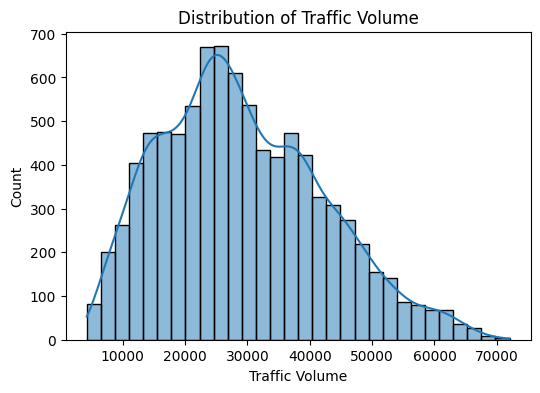

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Traffic Volume'], bins=30, kde=True)
plt.title("Distribution of Traffic Volume")
plt.show()


**Average Speed vs Traffic Volume**

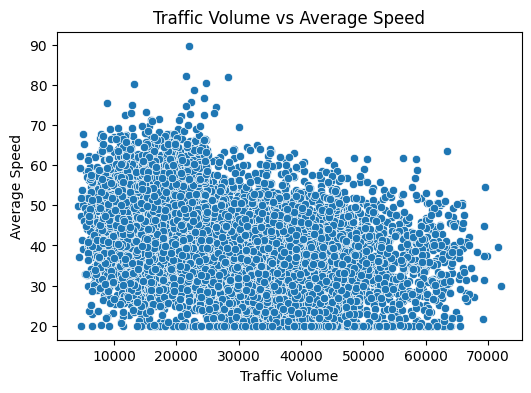

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Traffic Volume', y='Average Speed', data=df)
plt.title("Traffic Volume vs Average Speed")
plt.show()

**Correlation analysis**

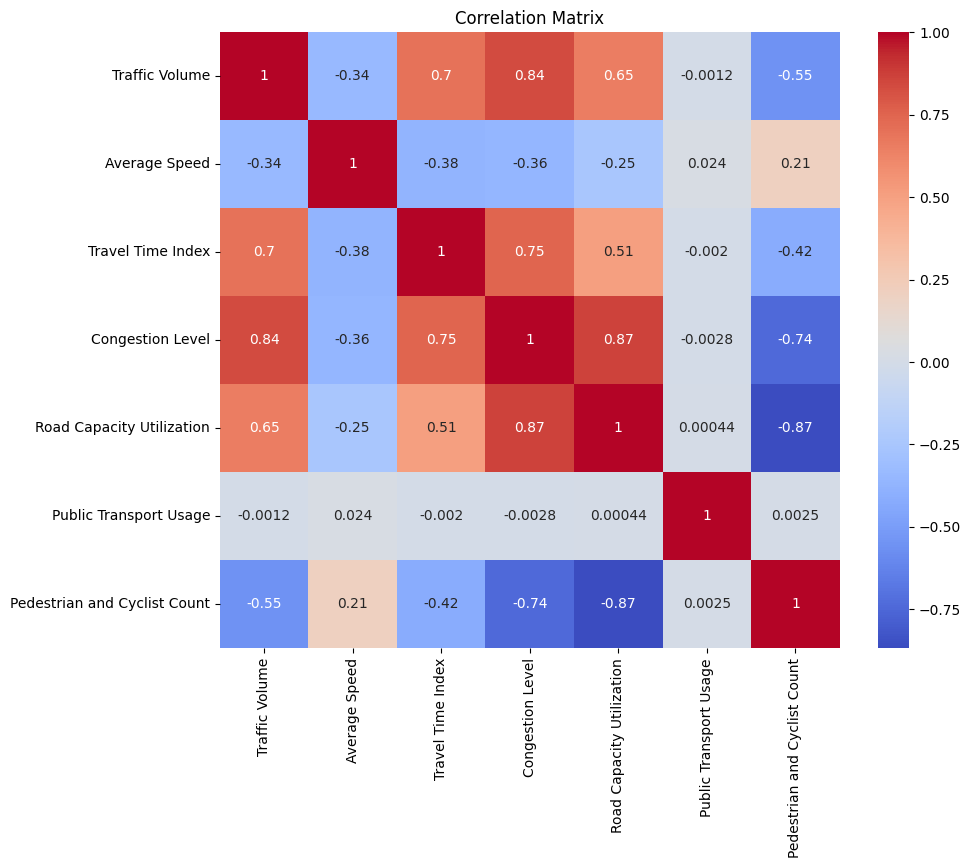

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


**Categorical data**

In [ ]:
for col in categorical_cols:
    print(f"\n{col}")
    print("Unique values:", df[col].nunique())
    print(df[col].value_counts().head())


Area Name
Unique values: 8
Area Name
Indiranagar    1720
M.G. Road      1501
Koramangala    1364
Jayanagar      1173
Hebbal          950
Name: count, dtype: int64

Road/Intersection Name
Unique values: 16
Road/Intersection Name
100 Feet Road          860
CMH Road               860
Anil Kumble Circle     759
Trinity Circle         742
Sony World Junction    684
Name: count, dtype: int64

Weather Conditions
Unique values: 5
Weather Conditions
Clear       5426
Overcast    1296
Fog          959
Rain         827
Windy        428
Name: count, dtype: int64


**Distribution of Event and Contexual Features**

**Incident Reports**

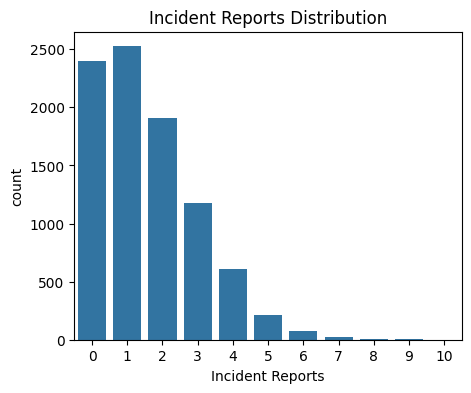

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Incident Reports', data=df)
plt.title("Incident Reports Distribution")
plt.show()

**Roadwork and Construction Activity**

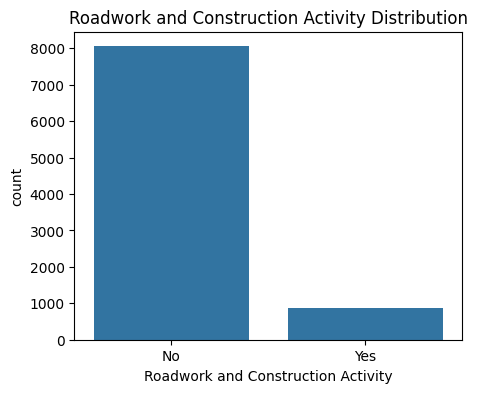

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Roadwork and Construction Activity', data=df)
plt.title("Roadwork and Construction Activity Distribution")
plt.show()

**Weather Conditions**

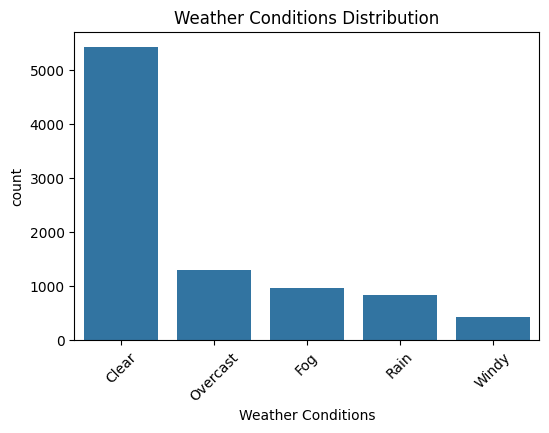

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Weather Conditions', data=df)
plt.title("Weather Conditions Distribution")
plt.xticks(rotation=45)
plt.show()

**Human & behavioral feature analysis**

**Public Transport Usage**

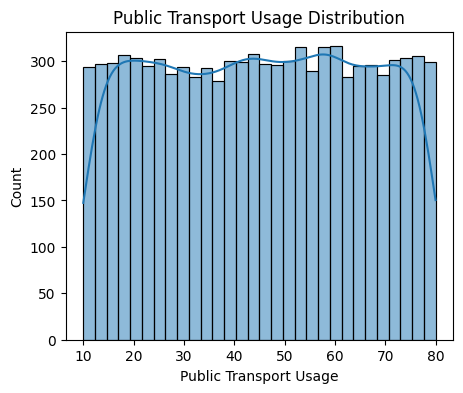

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(df['Public Transport Usage'], bins=30, kde=True)
plt.title("Public Transport Usage Distribution")
plt.show()

**Pedestrian and Cyclist Count**

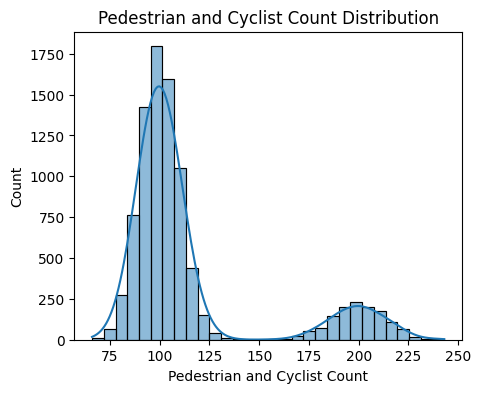

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(df['Pedestrian and Cyclist Count'], bins=30, kde=True)
plt.title("Pedestrian and Cyclist Count Distribution")
plt.show()


**Parking Usage**

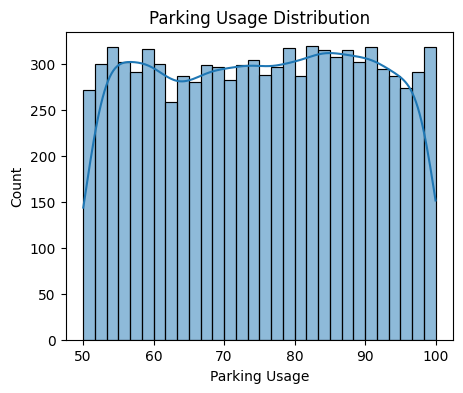

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(df['Parking Usage'], bins=30, kde=True)
plt.title("Parking Usage Distribution")
plt.show()

**Traffic Signal Compliance**

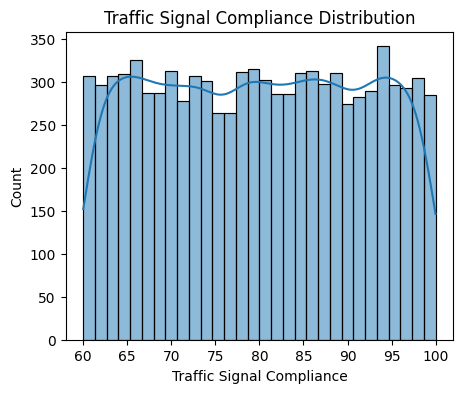

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(df['Traffic Signal Compliance'], bins=30, kde=True)
plt.title("Traffic Signal Compliance Distribution")
plt.show()


**Conditional Analysis**

**Traffic Volume vs Incidents**

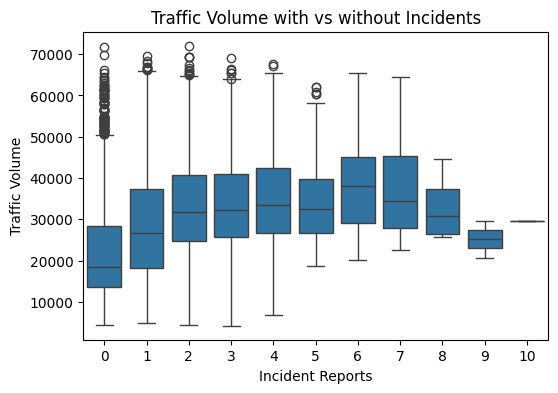

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Incident Reports', y='Traffic Volume', data=df)
plt.title("Traffic Volume with vs without Incidents")
plt.show()


**Traffic Volume vs Roadwork**

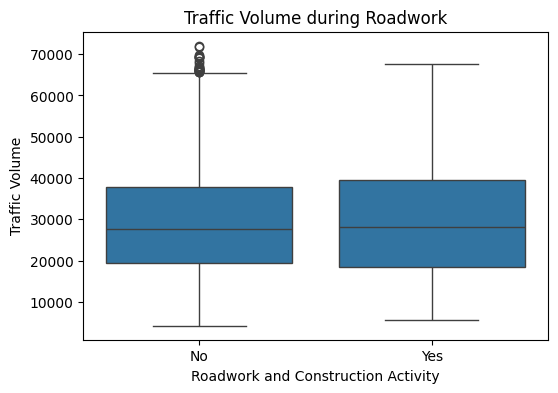

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Roadwork and Construction Activity', y='Traffic Volume', data=df)
plt.title("Traffic Volume during Roadwork")
plt.show()


**Traffic Volume vs Weather**

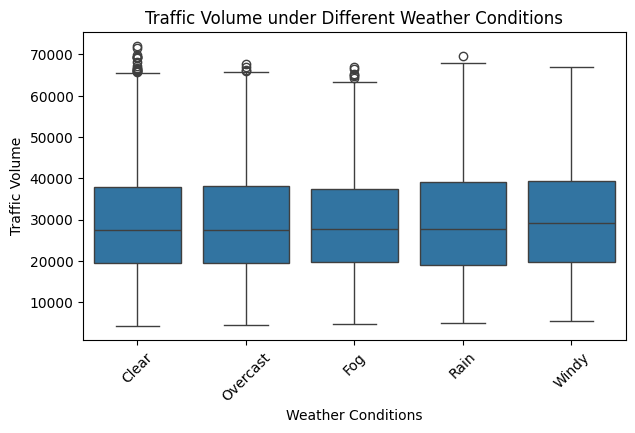

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Weather Conditions', y='Traffic Volume', data=df)
plt.title("Traffic Volume under Different Weather Conditions")
plt.xticks(rotation=45)
plt.show()


**Top Traffic Volume Area**

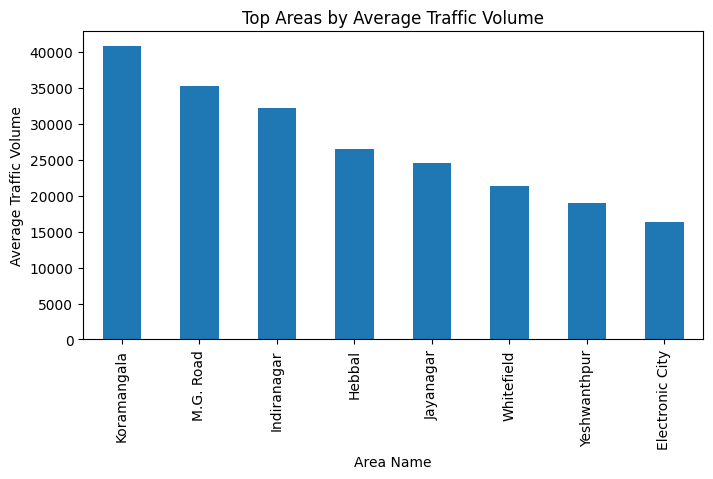

In [ ]:
top_areas = (
    df.groupby('Area Name')['Traffic Volume']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

top_areas.plot(kind='bar', figsize=(8,4), title="Top Areas by Average Traffic Volume")
plt.ylabel("Average Traffic Volume")
plt.show()


**Top Roads/Intersection**

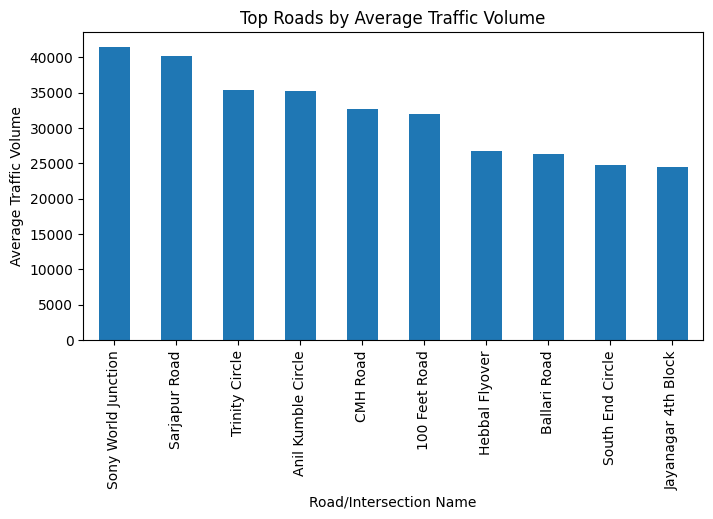

In [ ]:
top_roads = (
    df.groupby('Road/Intersection Name')['Traffic Volume']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

top_roads.plot(kind='bar', figsize=(8,4), title="Top Roads by Average Traffic Volume")
plt.ylabel("Average Traffic Volume")
plt.show()


**Target Variable**

In [ ]:
target='Traffic Volume'

In [ ]:
feature_cols = [
    col for col in df.columns
    if col not in ['Traffic Volume', 'Date']
]

feature_cols


['Area Name',
 'Road/Intersection Name',
 'Average Speed',
 'Travel Time Index',
 'Congestion Level',
 'Road Capacity Utilization',
 'Incident Reports',
 'Environmental Impact',
 'Public Transport Usage',
 'Traffic Signal Compliance',
 'Parking Usage',
 'Pedestrian and Cyclist Count',
 'Weather Conditions',
 'Roadwork and Construction Activity',
 'Day',
 'Month',
 'DayOfWeek',
 'IsWeekend']

# Data Preprocessing

In [ ]:
# #high correlation with traffic volume
# leakage_cols = [
#     'Congestion Level',
#     'Travel Time Index',
#     'Road Capacity Utilization'
# ]

# df_clean = df.drop(columns=leakage_cols)


In [ ]:
target = 'Traffic Volume'

X = df.drop(columns=[target, 'Environmental Impact'])
y = df[target]

print(X.shape, y.shape)

(8936, 18) (8936,)


In [ ]:
X = X.drop(columns=['Date'])

In [ ]:
X.head()

,Area Name,Road/Intersection Name,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,Day,Month,DayOfWeek,IsWeekend
0,Indiranagar,100 Feet Road,50.230299,1.500000,100.000000,100.000000,0,70.632330,84.044600,85.403629,111,Clear,No,1,1,5,1
1,Indiranagar,CMH Road,29.377125,1.500000,100.000000,100.000000,1,41.924899,91.407038,59.983689,100,Clear,No,1,1,5,1
2,Whitefield,Marathahalli Bridge,54.474398,1.039069,28.347994,36.396525,0,44.662384,61.375541,95.466020,189,Clear,No,1,1,5,1
3,Koramangala,Sony World Junction,43.817610,1.500000,100.000000,100.000000,1,32.773123,75.547092,63.567452,111,Clear,No,1,1,5,1
4,Koramangala,Sarjapur Road,41.116763,1.500000,100.000000,100.000000,3,35.092601,64.634762,93.155171,104,Clear,No,1,1,5,1


In [ ]:
y.head()

,Traffic Volume
0,50590
1,30825
2,7399
3,60874
4,57292


In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_cols, numerical_cols

(['Area Name',
  'Road/Intersection Name',
  'Weather Conditions',
  'Roadwork and Construction Activity'],
 ['Average Speed',
  'Travel Time Index',
  'Congestion Level',
  'Road Capacity Utilization',
  'Incident Reports',
  'Public Transport Usage',
  'Traffic Signal Compliance',
  'Parking Usage',
  'Pedestrian and Cyclist Count',
  'IsWeekend'])

**Imputation** - not required

In [ ]:
# from sklearn.impute import SimpleImputer

# num_imputer = SimpleImputer(strategy='median')
# cat_imputer = SimpleImputer(strategy='most_frequent')

# X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])
# X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False
)

encoded_cat = encoder.fit_transform(X[categorical_cols])
encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=encoder.get_feature_names_out(categorical_cols)
)

In [ ]:
X_processed = pd.concat(
    [pd.DataFrame(X[numerical_cols].reset_index(drop=True)),
     encoded_cat_df.reset_index(drop=True)],
    axis=1
)

print(X_processed.shape)


(8936, 41)


In [ ]:
X_processed

,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,IsWeekend,...,Road/Intersection Name_Trinity Circle,Road/Intersection Name_Tumkur Road,Road/Intersection Name_Yeshwanthpur Circle,Weather Conditions_Clear,Weather Conditions_Fog,Weather Conditions_Overcast,Weather Conditions_Rain,Weather Conditions_Windy,Roadwork and Construction Activity_No,Roadwork and Construction Activity_Yes
0,50.230299,1.500000,100.000000,100.000000,0,70.632330,84.044600,85.403629,111,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,29.377125,1.500000,100.000000,100.000000,1,41.924899,91.407038,59.983689,100,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,54.474398,1.039069,28.347994,36.396525,0,44.662384,61.375541,95.466020,189,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,43.817610,1.500000,100.000000,100.000000,1,32.773123,75.547092,63.567452,111,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,41.116763,1.500000,100.000000,100.000000,3,35.092601,64.634762,93.155171,104,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,23.440276,1.262384,35.871483,57.354487,1,21.523289,83.530352,97.898279,211,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8932,45.168429,1.500000,100.000000,100.000000,3,29.822312,60.738488,60.355967,95,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8933,22.028609,1.500000,100.000000,100.000000,1,43.185905,85.321627,61.333731,110,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8934,52.254798,1.020520,72.639152,97.845527,2,44.416043,89.586947,79.197198,94,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)

X_scaled = pd.DataFrame(X_scaled, columns=X_processed.columns)


In [ ]:
split_ratio = 0.8
split_index = int(len(X_scaled) * split_ratio)

X_train = X_scaled.iloc[:split_index]
X_test = X_scaled.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

X_train.shape, X_test.shape


((7148, 41), (1788, 41))

In [ ]:
print("Train target range:", y_train.min(), y_train.max())
print("Test target range:", y_test.min(), y_test.max())

Train target range: 4233 72039
Test target range: 4772 69158


# Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb


In [ ]:
def evaluate_model(model, X_train, y_train, x_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  return mae, rmse, r2

**Linear Regression**

In [ ]:
lr = LinearRegression()
lr_results = evaluate_model(lr, X_train, y_train, X_test, y_test)
lr_results

(4519.567409134813, np.float64(6115.100510012544), 0.7734382004686483)

**Decision Tree**

In [ ]:
dt = DecisionTreeRegressor(
    max_depth=12,
    random_state=42
)

dt_results = evaluate_model(dt, X_train, y_train, X_test, y_test)
dt_results


(3484.4281514560516, np.float64(5944.041823481801), 0.7859362154339105)

**Random Forest**

In [ ]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

rf_results = evaluate_model(rf, X_train, y_train, X_test, y_test)
rf_results


(2904.4347370648197, np.float64(4850.3793861686645), 0.8574619197647064)

**Suppport Vector Regressor**

In [ ]:
svr = SVR(
    kernel='rbf',
    C=100,
    epsilon=0.1
)

svr_results = evaluate_model(svr, X_train, y_train, X_test, y_test)
svr_results


(5287.6438002298355, np.float64(7567.452267092463), 0.6530404333291001)

**KNN Regressor**

In [ ]:
knn = KNeighborsRegressor(
    n_neighbors=10,
    weights='distance'
)

knn_results = evaluate_model(knn, X_train, y_train, X_test, y_test)
knn_results


(5184.7220082076565, np.float64(7358.740501317304), 0.6719149337236663)

**Naive Bayes**

In [ ]:
gnb = GaussianNB()
gnb_results = evaluate_model(gnb, X_train, y_train, X_test, y_test)
gnb_results


(5027.5587248322145, np.float64(7760.612349820306), 0.6351020131894536)

**AdaBoost**

In [ ]:
ada = AdaBoostRegressor(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42
)

ada_results = evaluate_model(ada, X_train, y_train, X_test, y_test)
ada_results

(3558.0016598576926, np.float64(5186.922209455736), 0.8369957395600991)

**Gradient Boosting**

In [ ]:
gbr = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

gbr_results = evaluate_model(gbr, X_train, y_train, X_test, y_test)
gbr_results

(3027.344628847325, np.float64(4960.919816829424), 0.8508909849557926)

**XGBoost**

In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

xgb_results = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)
xgb_results

(3119.4892578125, np.float64(5107.114057860858), 0.8419732451438904)

In [ ]:
results_df = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Decision Tree',
        'Random Forest',
        'SVR',
        'KNN',
        'Naive Bayes',
        'AdaBoost',
        'Gradient Boosting',
        'XGBoost'
    ],
    'MAE': [
        lr_results[0], dt_results[0], rf_results[0],
        svr_results[0], knn_results[0], gnb_results[0],
        ada_results[0], gbr_results[0], xgb_results[0]
    ],
    'RMSE': [
        lr_results[1], dt_results[1], rf_results[1],
        svr_results[1], knn_results[1], gnb_results[1],
        ada_results[1], gbr_results[1], xgb_results[1]
    ],
    'R2': [
        lr_results[2], dt_results[2], rf_results[2],
        svr_results[2], knn_results[2], gnb_results[2],
        ada_results[2], gbr_results[2], xgb_results[2]
    ]
})

results_df.sort_values(by='RMSE')


,Model,MAE,RMSE,R2
2,Random Forest,2966.210182,4954.904409,0.851252
7,Gradient Boosting,3027.344629,4960.919817,0.850891
8,XGBoost,3119.489258,5107.114058,0.841973
6,AdaBoost,3558.001660,5186.922209,0.836996
1,Decision Tree,3484.428151,5944.041823,0.785936
0,Linear Regression,4519.567409,6115.100510,0.773438
4,KNN,5184.722008,7358.740501,0.671915
3,SVR,5287.643800,7567.452267,0.653040
5,Naive Bayes,5027.558725,7760.612350,0.635102


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
# rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# rf_param_grid = {
#     'n_estimators': [200, 300, 500],
#     'max_depth': [10, 15, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# rf_grid = GridSearchCV(
#     rf,
#     rf_param_grid,
#     cv=tscv,
#     scoring='neg_root_mean_squared_error',
#     n_jobs=-1,
#     verbose=1
# )

# rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 300, 500]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
# rf_grid.best_score_

np.float64(-5264.575891978357)

In [ ]:
# rf_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}